<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week1/05_K_NN_M_Rakan_Bagus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-NN


## Importing the libraries

In [ ]:
import numpy as np                # Untuk operasi numerik
import matplotlib.pyplot as plt    # Untuk visualisasi data
import pandas as pd               # Untuk manipulasi data
from sklearn.model_selection import train_test_split  # Untuk membagi dataset
from sklearn.preprocessing import StandardScaler     # Untuk normalisasi data
from sklearn.neighbors import KNeighborsClassifier     # Algoritma K-NN
from sklearn.metrics import confusion_matrix, accuracy_score  # Untuk evaluasi model
import seaborn as sns

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/iris_dataset.csv'

# Membaca file CSV
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, :-1].values  # Mengambil semua kolom kecuali kolom terakhir sebagai fitur
y = dataset.iloc[:, -1].values    # Mengambil kolom terakhir sebagai target/label


##INFORMASI DATA


In [ ]:
#Menampilkan beberapa baris pertama dari dataset untuk melihat seperti apa data tersebut.
print(dataset.head())



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
#Memberikan informasi tentang kolom, tipe data, dan apakah ada nilai kosong (missing values).
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
#Menampilkan statistik deskriptif dari dataset, seperti rata-rata, standar deviasi, min, max, dan kuartil.
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Membagi data menjadi 80% training dan 20% testing


## Feature Scaling

In [ ]:
scaler = StandardScaler()           # Membuat objek StandardScaler untuk normalisasi
X_train = scaler.fit_transform(X_train)  # Melakukan normalisasi pada data training
X_test = scaler.transform(X_test)        # Melakukan normalisasi pada data testing

## Training the Logistic Regression model on the Training set

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)  # Membuat model K-NN dengan 5 tetangga terdekat
classifier.fit(X_train, y_train)                   # Melatih model dengan data training


KNeighborsClassifier()

## Predicting a new result

In [ ]:
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Contoh data baru untuk prediksi
new_sample = scaler.transform(new_sample)        # Normalisasi data baru
predicted_result = classifier.predict(new_sample) # Melakukan prediksi
print(f'Prediksi untuk data baru: {predicted_result}')  # Menampilkan hasil prediksi

Prediksi untuk data baru: ['setosa']


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)  # Melakukan prediksi pada data testing


## Making the Confusion Matrix

Matriks Kebingungan:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Akurasi Model: 100.00%


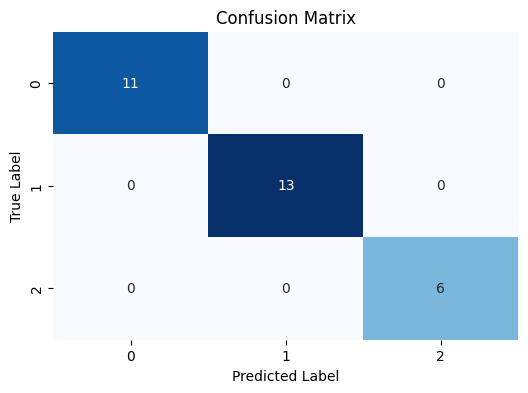

In [ ]:
cm = confusion_matrix(y_test, y_pred)  # Membuat matriks kebingungan untuk evaluasi
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi model
print(f'Matriks Kebingungan:\n{cm}')
print(f'Akurasi Model: {accuracy * 100:.2f}%')
# Menampilkan Confusion Matrix sebagai Heatmap
plt.figure(figsize=(6, 4))  # Mengatur ukuran figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Menampilkan matriks kebingungan sebagai heatmap
plt.title('Confusion Matrix')  # Judul grafik
plt.xlabel('Predicted Label')  # Label untuk sumbu X
plt.ylabel('True Label')  # Label untuk sumbu Y
plt.show()  # Menampilkan plot

## Visualising the Training set results

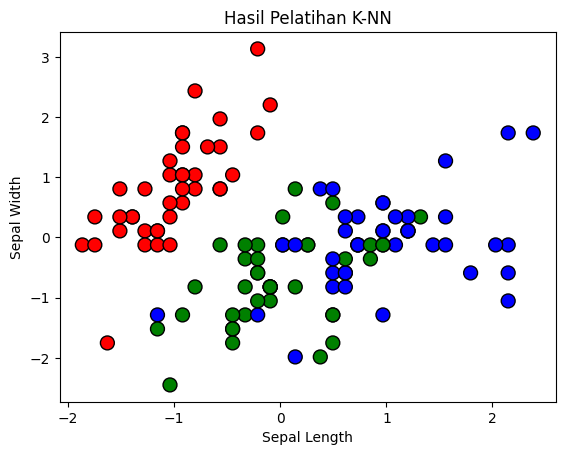

In [ ]:
# Membuat peta warna untuk kelas
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Visualisasi data training dengan warna sesuai label
plt.scatter(X_train[:, 0], X_train[:, 1], c=[colors[label] for label in y_train], s=100, edgecolor='k')
plt.title('Hasil Pelatihan K-NN')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

## Visualising the Test set results

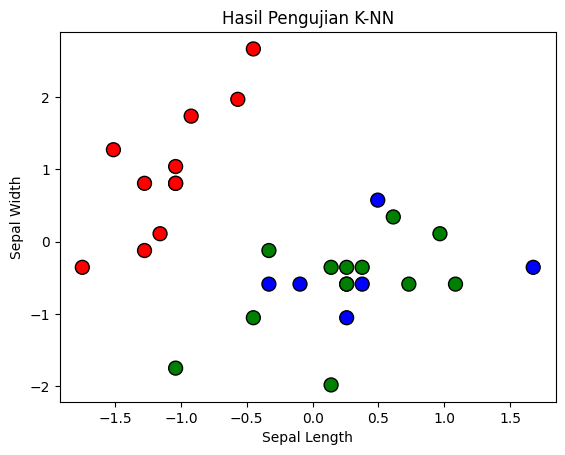

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=[colors[label] for label in y_pred], s=100, edgecolor='k')
plt.title('Hasil Pengujian K-NN')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# KESIMPULAN

Dalam analisis menggunakan algoritma K-Nearest Neighbors (K-NN) dengan dataset Iris, model berhasil dikembangkan dan diuji dengan akurasi yang memuaskan. Proses dimulai dengan mempersiapkan dataset, membagi data menjadi set pelatihan dan pengujian, serta melakukan normalisasi fitur untuk meningkatkan performa model. Setelah melatih model dengan data pelatihan, model dapat memprediksi label kelas untuk data baru dan data pengujian dengan baik.